# Who is *the best*?

>### Looking at the greatest offensive talents in NBA history

---

What we're looking at below are the **NBA's All-Time Leaders in Points + Assists** and diving into what the numbers tell us.

In [1]:
import pandas as pd
from nba_api.stats.endpoints import commonallplayers
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import alltimeleadersgrids
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## NBA Top 10 in Career Points + Assists
>Adding total career points + total career assists and making a scatterplot of the Top 10 highest totals in league history.
### Top 10 Scatter Plot

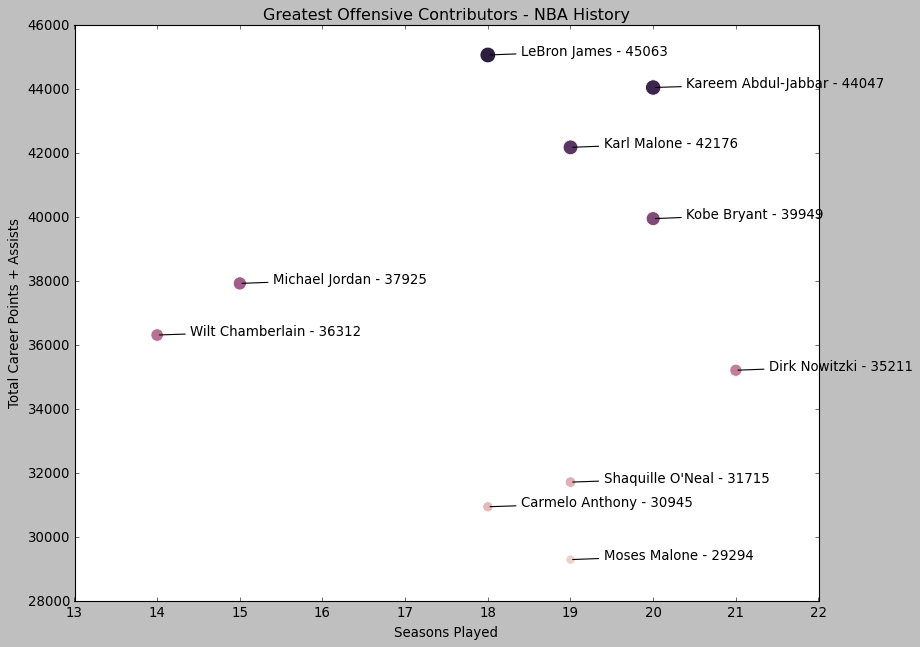

In [5]:
data = alltimeleadersgrids.AllTimeLeadersGrids()

df_pts = data.pts_leaders.get_data_frame().set_index('PLAYER_ID')
df_ast = data.ast_leaders.get_data_frame()

seasons, assists, games_played = [], [], []

for i in df_pts.index:
    
    stats_data = playercareerstats.PlayerCareerStats(i)
    df_stats = stats_data.season_totals_regular_season.get_data_frame()
    
    seasons.append(len(df_stats['SEASON_ID'].unique()))
    assists.append(df_stats.AST.sum())
    games_played.append(df_stats.GP.sum())
    
    
df_pts['Total Career Points + Assists'] = df_pts['PTS'] + assists
df_pts['Seasons Played'] = seasons
df_pts['GP'] = games_played
df_pts['AST'] = assists

df_pts.set_index('PLAYER_NAME', inplace=True)

plt.style.use('classic')  
plt.figure(figsize=(12, 9))

sns.scatterplot(
    data = df_pts, x = 'Seasons Played', y = 'Total Career Points + Assists', hue = 'Total Career Points + Assists', 
    size = 'Total Career Points + Assists', sizes = (70,200), legend = False)

plt.title('Greatest Offensive Contributors - NBA History')

for i in df_pts.index:
    plt.annotate((i + ' - ' + df_pts.loc[i]['Total Career Points + Assists'].astype(str)),
                 (df_pts.loc[i]['Seasons Played'], df_pts.loc[i]['Total Career Points + Assists']),
                 (df_pts.loc[i]['Seasons Played'] + 0.4, df_pts.loc[i]['Total Career Points + Assists']),
                 arrowprops=dict(arrowstyle='-'))
    

- Michael Jordan and Wilt Chamberlain played 14 and 15 years respectively, which is quite a bit less than everybody else in this Top 10. (LeBron and Carmelo have played the second least at 18 each, but they are still in the league.)
- By the time LeBron James retires, he will have created a pretty sizeable gap between himself and the rest of this group.
---

## Average Points per Game + Assists per Game PER SEASON
>Taking our Top 5 contributors from above, this line graph shows how many points per game + assists per game they averaged for each season of their career.  These lines tell each players story: injuries, coming into the NBA at a young age, a swift fall-off at season x, etc.
### Per Game/Per Season Averages

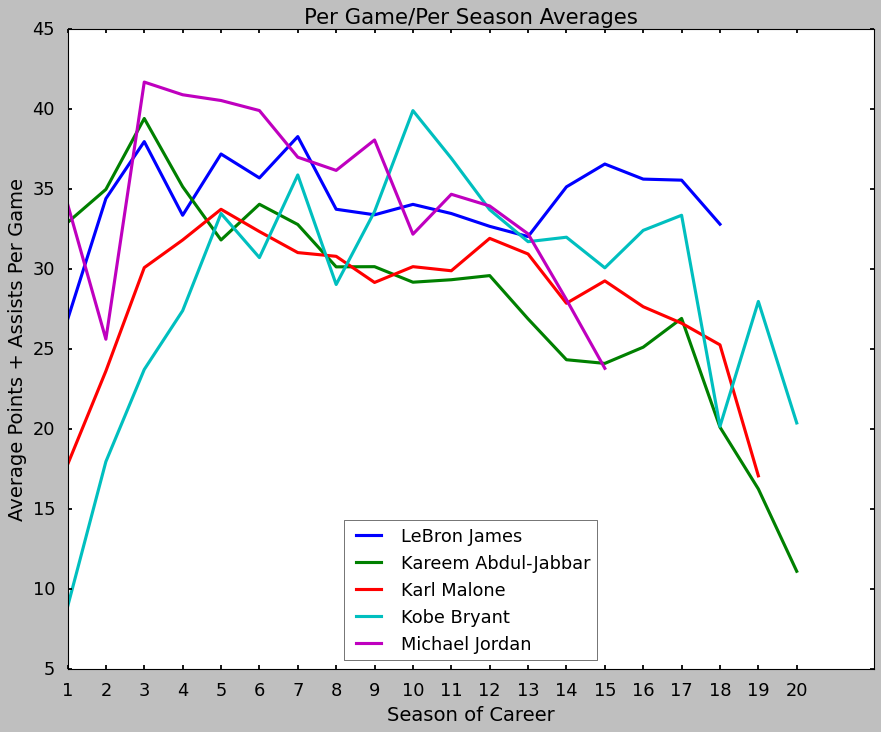

In [9]:
names = df_pts.sort_values(['Total Career Points + Assists'], ascending=False).index[0:5]
season_averages  =[]

for l in names:

    player_data = commonallplayers.CommonAllPlayers()
    df_playerdata = player_data.common_all_players.get_data_frame().set_index('DISPLAY_FIRST_LAST')

    stats_data = playercareerstats.PlayerCareerStats(df_playerdata.loc[l]['PERSON_ID'])
    df_playerstats = stats_data.season_totals_regular_season.get_data_frame()

    points = df_playerstats.PTS/df_playerstats.GP
    assists = df_playerstats.AST/df_playerstats.GP

    season_averages.append((points+assists).tolist())
    
length = [len(i) for i in season_averages]
    
plt.figure(figsize=(13, 10))    
plt.style.use('seaborn-poster')
[plt.plot(i, label = l) for i, l in zip(season_averages, names)]
    

plt.legend(loc = "lower center")
plt.title('Per Game/Per Season Averages')
plt.xlabel('Season of Career')
plt.ylabel('Average Points + Assists Per Game')
plt.xticks(np.arange(max(length)), np.arange(1, max(length) + 1))
plt.xlim(0, 21)
print(' ')

- What's interesting to see is how Kobe and LeBron (before Kobe's achilles injury) were playing at SUCH a higher level by year 17+ than the other three.  By that time, Jordan was out of the league and Malone and Kareem were producing way lower than they once had.  There are two clear reasons for this, in my opinion:
    1. LeBron and Kobe both skipped high school.  So their "Year 17" came at around the age of 35, whereas Jordan, Kareem and Karl, who all played college, would have been closer to 38 years old in their 17th season.
    2. LeBron and Kobe both played the bulk of their careers from 2000 onwards.  Why is this significant?  The science of sports and nutrition and rehabilitation is light years ahead of where it was in the 80's and 90's.  We will probably start to see more and more players playing at these high levels deep into their career as time goes on.
- LeBron, in year 18, is producing more points and assists than Karl Malone, the 3rd greatest offensive contributor of all time, did during ANY season of his career.
---

## Career Points + Assists TOTALS by Year
>Again using our Top 5, this graph charts each players total points + assists for each season of their career.
### Career Totals

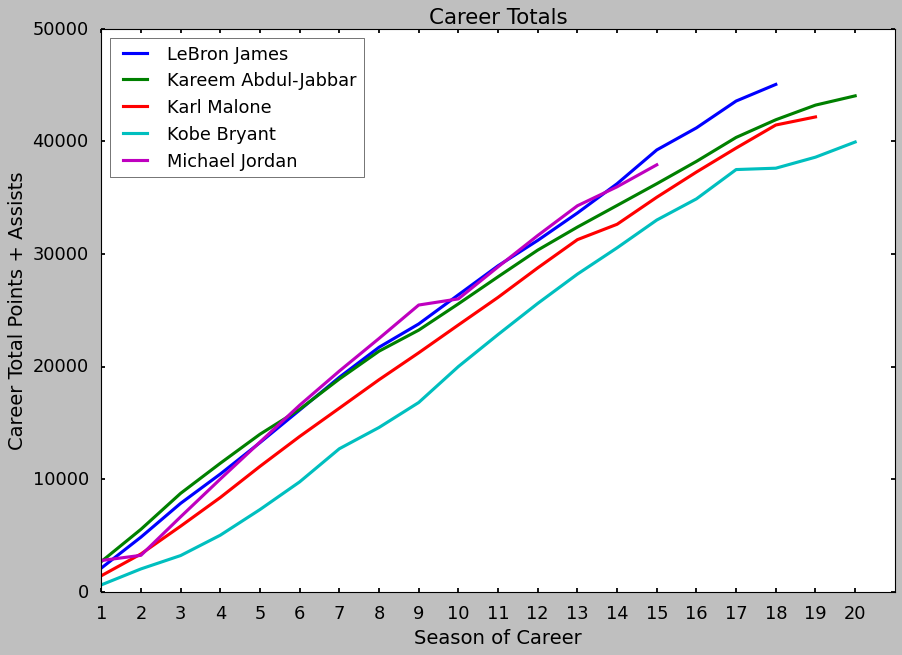

<Figure size 1120x880 with 0 Axes>

In [10]:
def totals(names):
    
    for l in names:
    
        stats_data = playercareerstats.PlayerCareerStats(df_playerdata.loc[l]['PERSON_ID'])
        df2 = stats_data.season_totals_regular_season.get_data_frame()

        total_stats = df2.PTS + df2.AST
        total_stats.index = np.arange(1, len(total_stats) + 1)

        for i in range(1, len(total_stats)+ 1):
            if i == 1:
                total_stats[i] = total_stats[i]
            else:
                total_stats[i] = total_stats[i] + total_stats[i - 1]

        
        sns.lineplot(data = total_stats, legend = 'brief', label = l)
        plt.legend(loc = 'upper left')
        plt.title('Career Totals')
        plt.xlabel('Season of Career')
        plt.ylabel('Career Total Points + Assists')
        plt.xticks(np.arange(max(length)+1), np.arange(0, max(length) +1))
        plt.xlim(1, 21)
    return plt.figure(figsize=(14, 11)), plt.style.use('seaborn-poster'), plt.show()

totals(df_pts.sort_values(['Total Career Points + Assists'], ascending=False).index[0:5])
print(' ')

- This graph will look pretty remarkable in just a few more seasons as LeBron continues to distance himself from the pack.
- You can see how far below the rest of the group Kobe started, yet because of his health and longevity was still able to catch and surpass Jordan.
- Jordan and LeBron were neck and neck through 14 years of their NBA career.  Ultimately, what will set LeBron apart from Jordan is his health and longevity.
---
---
---

## Will anybody catch LeBron?

>First, I chose **six of the best and most established players in the world today**.  Each of these players has played for 8+ years, but they're all much younger than LeBron.
### Career Totals

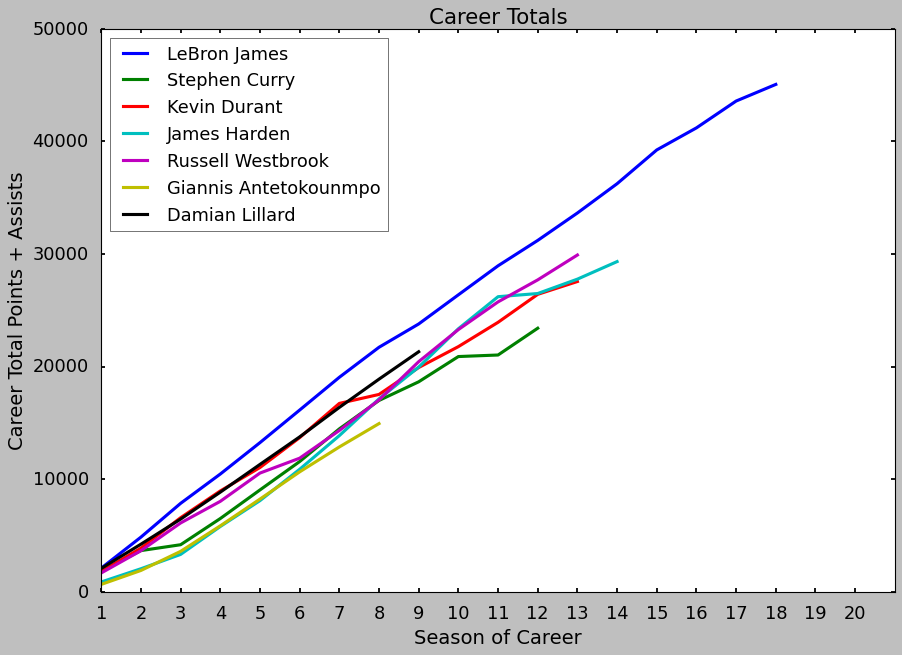

<Figure size 1120x880 with 0 Axes>

In [11]:
current_stars = (['LeBron James', 'Stephen Curry', 'Kevin Durant', 'James Harden', 'Russell Westbrook',
         'Giannis Antetokounmpo', 'Damian Lillard'])

totals(current_stars)
print(' ')

- Simply put: No.  None of them are on pace to catch LeBron, and they are to far into their careers at this point to realistically overcome the distance.

---
## 'Young' Hope?
>Below I did the same, but for the **YOUNG stars of the game**.  Are any of them following LeBron's *early trajectory?*
### Per Game/Per Season Averages

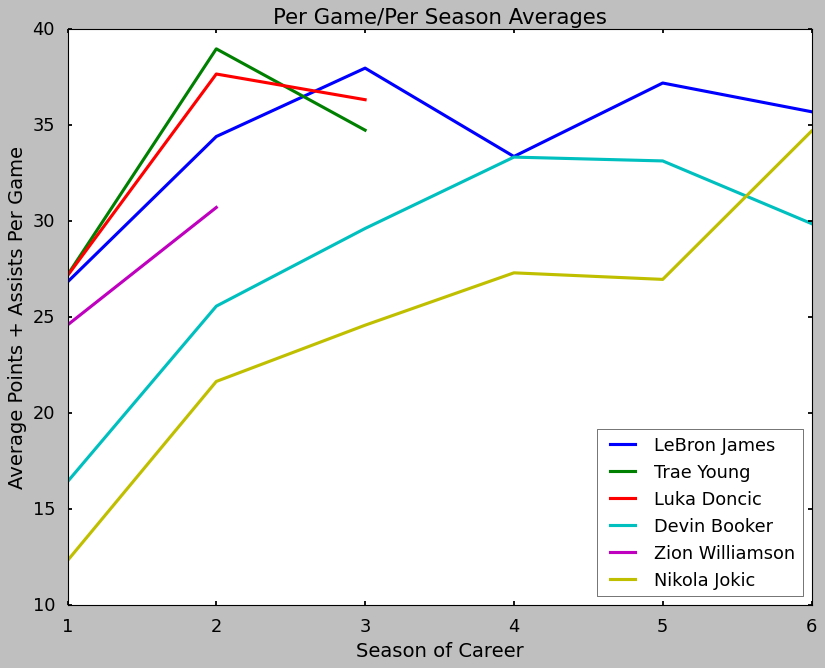

In [12]:
names = (['LeBron James', 'Trae Young', 'Luka Doncic', 'Devin Booker', 'Zion Williamson', 'Nikola Jokic'])
season_averages = []

for l in names:
    
    if l == 'LeBron James':
        
        stats_data = playercareerstats.PlayerCareerStats(df_playerdata.loc[l]['PERSON_ID'])
        df_playerstats = stats_data.season_totals_regular_season.get_data_frame()

        points = df_playerstats.PTS/df_playerstats.GP
        assists = df_playerstats.AST/df_playerstats.GP
        total = points + assists
        total = total[0:6]
        season_averages.append(total.tolist())
        
    else:
        
        stats_data = playercareerstats.PlayerCareerStats(df_playerdata.loc[l]['PERSON_ID'])
        df_playerstats = stats_data.season_totals_regular_season.get_data_frame()

        points = df_playerstats.PTS/df_playerstats.GP
        assists = df_playerstats.AST/df_playerstats.GP
        season_averages.append((points + assists).tolist())

plt.figure(figsize=(12, 9))    
plt.style.use('seaborn-poster')

[plt.plot(i, label = l) for i, l in zip(season_averages, names)]
    

plt.legend(loc = "lower right")
plt.title('Per Game/Per Season Averages')
plt.xlabel('Season of Career')
plt.ylabel('Average Points + Assists Per Game')
plt.xticks(np.arange(6), np.arange(1, 7))
print(' ')

- What we can see is that two players, Trae Young and Luka Doncic, actually averaged **more Points + Assists** per game than LeBron did over his first two seasons, though they fell behind his pace a bit during their third.
- So, surely this means they are on trajectory (so far, at least) to overtake LeBron's **total Points + Assists record**?  See below!
---
### Career Totals

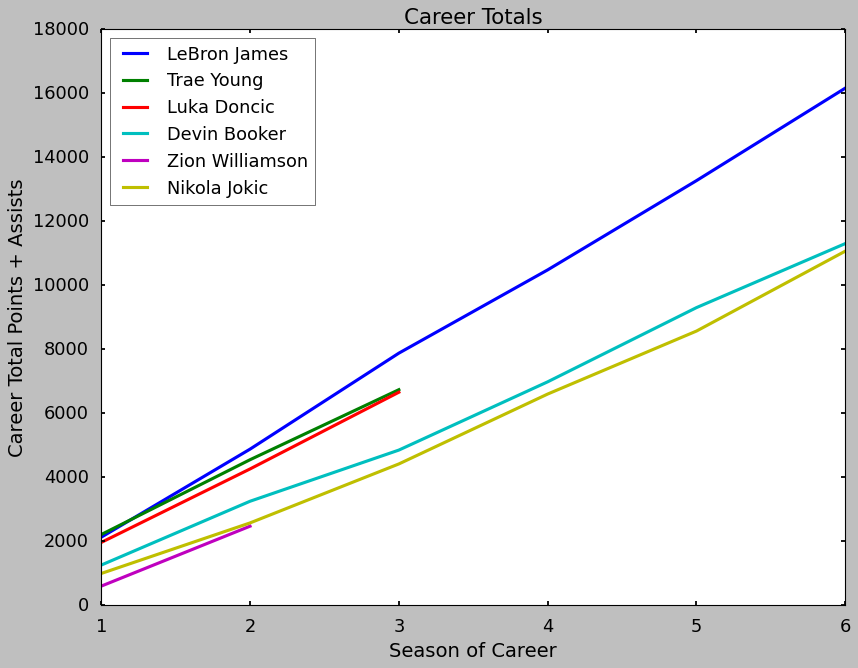

In [13]:
season_totals = []

for l in names:

    if l == 'LeBron James':

        stats_data = playercareerstats.PlayerCareerStats(df_playerdata.loc[l]['PERSON_ID'])
        df2 = stats_data.season_totals_regular_season.get_data_frame()

        total_stats = df2.PTS + df2.AST
        total_stats = total_stats[0:6]
        total_stats.index = np.arange(1, len(total_stats) + 1)

        for i in range(1, len(total_stats)+ 1):
            if i == 1:
                total_stats[i] = total_stats[i]
            else:
                total_stats[i] = total_stats[i] + total_stats[i - 1]
                
        season_totals.append(total_stats.tolist())

    else:

        stats_data = playercareerstats.PlayerCareerStats(df_playerdata.loc[l]['PERSON_ID'])
        df2 = stats_data.season_totals_regular_season.get_data_frame()

        total_stats = df2.PTS + df2.AST
        total_stats.index = np.arange(1, len(total_stats) + 1)

        for i in range(1, len(total_stats)+ 1):
            if i == 1:
                total_stats[i] = total_stats[i]
            else:
                total_stats[i] = total_stats[i] + total_stats[i - 1]
                
        season_totals.append(total_stats.tolist())

plt.figure(figsize=(12, 9))
plt.style.use('seaborn-poster')        
        
[plt.plot(i, label = l) for i, l in zip(season_totals, names)]
plt.legend(loc = 'upper left')
plt.title('Career Totals')
plt.xlabel('Season of Career')
plt.ylabel('Career Total Points + Assists')
plt.xticks(np.arange(6), np.arange(1, 7))
print(' ')

- Surprisingly...no, they aren't particularly close to LeBron's totals, even by Year 3 there is a pretty sizeable gap.
- For the others this makes sense, LeBron's yearly averages were simply higher than theirs.  But for **Luka and Trae, who averaged more Points + Assists over their first two seasons**, how can this be?
---

## Health Matters
>Lastly - aside from a player having to be supremely talented to catch LeBron, HEALTH and AVAILABILITY are just as important of factors.  The chart below shows this by taking LeBron, Luka, and Trae, but only charting their **games played per season**.
### Games Played Per Season

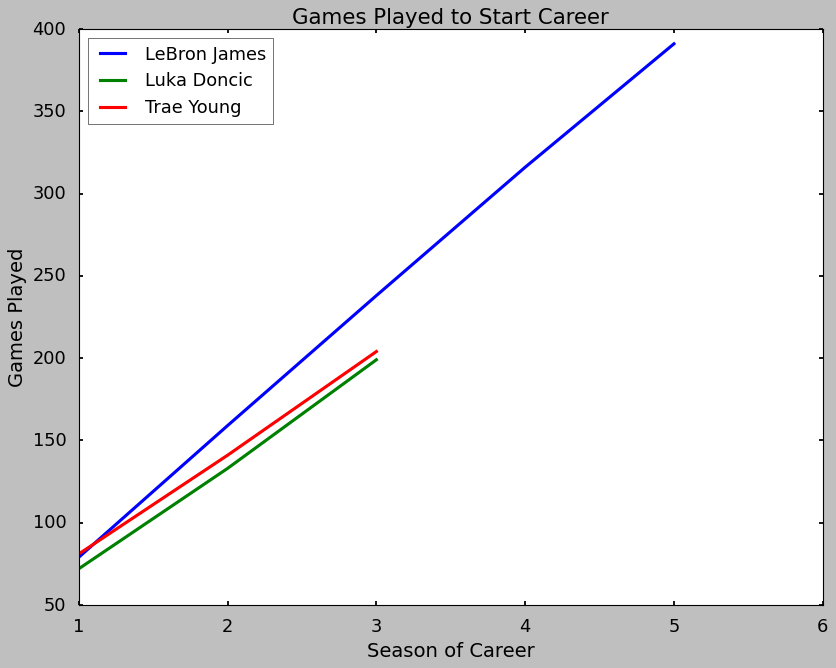

In [14]:
names = ['LeBron James', 'Luka Doncic', 'Trae Young']
games_played = []

for l in names:
    
    if l == 'LeBron James':
        
        stats_data = playercareerstats.PlayerCareerStats(df_playerdata.loc[l]['PERSON_ID'])
        df2 = stats_data.season_totals_regular_season.get_data_frame()

        total_games = df2.GP
        total_games = total_games[0:5]
        total_games.index = np.arange(1, len(total_games) + 1)

        for i in range(1, len(total_games)+ 1):
            if i == 1:
                total_games[i] = total_games[i]
            else:
                total_games[i] = total_games[i] + total_games[i - 1]
                
        games_played.append(total_games.tolist())
                
    else:
        
        stats_data = playercareerstats.PlayerCareerStats(df_playerdata.loc[l]['PERSON_ID'])
        df2 = stats_data.season_totals_regular_season.get_data_frame()

        total_games = df2.GP
        total_games = total_games[0:len(total_games)]
        total_games.index = np.arange(1, len(total_games) + 1)

        for i in range(1, len(total_games)+ 1):
            if i == 1:
                total_games[i] = total_games[i]
            else:
                total_games[i] = total_games[i] + total_games[i - 1]
                
        games_played.append(total_games.tolist())

plt.figure(figsize=(12, 9))
plt.style.use('seaborn-poster')        
        
[plt.plot(i, label = l) for i, l in zip(games_played, names)]
plt.legend(loc = 'upper left')
plt.title('Games Played to Start Career')
plt.xlabel('Season of Career')
plt.ylabel('Games Played')
plt.xticks(np.arange(6), np.arange(1, 7))
print(' ')

- **Health really matters**.  Aside from being an all-time great offensive producer, LeBron almost never gets hurt and is consistently available, night after night.
- It's just another reason that his career totals will be so hard to catch.
---
---
---

## Thanks for reading!
*Michael Black*